In [31]:
# skiprows: pular linhas do arquivo sirgas baixado e extraido
import os
import gzip
import shutil
import requests
import re
import random
from zipfile import ZipFile
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import numpy as np


In [32]:
link_crd = "https://www.sirgas.org/archive/gps/SIRGAS/SIRGAS2022/SIRGAS2022_XYZ.CRD.gz"
link_vel = "https://www.sirgas.org/archive/gps/SIRGAS/SIRGAS2022/SIRGAS2022_XYZ.VEL.gz"
folder = "C:\\Users\\filip\\progcart\\projeto_2_geopandas\\docs\\files\\download_teste"

In [33]:
server_url_format_crd = link_crd # Stores the URL in the instance attribute
server_url_format_vel = link_vel # Stores the URL in the instance attribute
destination_folder = folder # Stores the destination folder in the instance attribute
# self.file_Path_extraction = None # Initialize the instance attribute as None

In [34]:
if not os.path.exists(destination_folder): # Creates a folder if it doesn't exist
    os.makedirs(destination_folder)
    print("A seguinte pasta foi criada: ", destination_folder)
            

In [35]:
# Download CRD
file_name_crd = os.path.basename(server_url_format_crd) # Get the base name in specified path. Use os.path.split() method to split the specified path into a pair (head, tail)            
print(file_name_crd)
# If file_name_crd has invalid characters or is empty
invalid_chars = r'[<>:"/\\|?*]' # Creates a character class with invalid characters
if not file_name_crd or re.search(invalid_chars, file_name_crd): # Checks if the file_name_crd is empty or contains invalid characters (re.search looks for any invalid characters)
    file_name_crd = f"download_{random.randint(1, 99999)}.zip"  # Nome padrão com número aleatório

file_path_crd = os.path.join(destination_folder, file_name_crd) # Create the destination path based on the destination folder and the file name

response = requests.get(server_url_format_crd) # Getting the url
if response.status_code == 200: #If ok, downloads the file
    with open(file_path_crd, 'wb') as file: # When opening files using open(), the WITH statement ensures that the file is closed automatically after operations are completed. 
        file.write(response.content)
        print("Arquivo salvo em: ", file_path_crd)
else:
    print('Falha ao realizar download')

SIRGAS2022_XYZ.CRD.gz
Arquivo salvo em:  C:\Users\filip\progcart\projeto_2_geopandas\docs\files\download_teste\SIRGAS2022_XYZ.CRD.gz


In [36]:
# Download VEL
file_name_vel = os.path.basename(server_url_format_vel) # Get the base name in specified path. Use os.path.split() method to split the specified path into a pair (head, tail)            
# If file_name_vel has invalid characters or is empty
invalid_chars = r'[<>:"/\\|?*]' # Creates a character class with invalid characters
if not file_name_vel or re.search(invalid_chars, file_name_vel): # Checks if the file_name_vel is empty or contains invalid characters (re.search looks for any invalid characters)
    file_name_vel = f"download_{random.randint(1, 99999)}.zip"  # Nome padrão com número aleatório

file_path_vel = os.path.join(destination_folder, file_name_vel) # Create the destination path based on the destination folder and the file name
print("file_path_vel: ", file_path_vel)

response = requests.get(server_url_format_vel) # Getting the url
if response.status_code == 200: #If ok, downloads the file
    with open(file_path_vel, 'wb') as file: # When opening files using open(), the WITH statement ensures that the file is closed automatically after operations are completed. 
        file.write(response.content)
        print("Arquivo salvo em: ", file_path_vel)
else:
    print('Falha ao realizar download')



file_path_vel:  C:\Users\filip\progcart\projeto_2_geopandas\docs\files\download_teste\SIRGAS2022_XYZ.VEL.gz
Arquivo salvo em:  C:\Users\filip\progcart\projeto_2_geopandas\docs\files\download_teste\SIRGAS2022_XYZ.VEL.gz


In [37]:
pd.set_option('display.max_colwidth', None)


In [38]:
# Decompress and creates the CRD Data Frame
df_crd = pd.read_csv(file_path_crd, compression='gzip', encoding="ANSI", on_bad_lines='skip', skiprows=18, sep="\s+", header=None)
csv_path_crd = os.path.join(destination_folder, "df_crd.csv")
print("CSV path", csv_path_crd)
df_crd.to_csv(csv_path_crd, index=False)


CSV path C:\Users\filip\progcart\projeto_2_geopandas\docs\files\download_teste\df_crd.csv


In [39]:
df_crd.head(4)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1,AACR,40612M001,6.440090e+05,0.00116,-6.251064e+06,0.00377,1.093781e+06,0.00114,A,1,2010-08-01,2012-09-04
1,2,AACR,40612M001,6.440090e+05,0.00100,-6.251064e+06,0.00320,1.093781e+06,0.00097,A,2,2012-09-06,2017-11-12
2,3,AACR,40612M001,6.440090e+05,0.00094,-6.251064e+06,0.00277,1.093781e+06,0.00092,A,3,2017-11-14,2022-04-30
3,4,ABCC,41939M001,1.739438e+06,0.00065,-6.117253e+06,0.00150,5.150650e+05,0.00041,A,1,2011-08-29,2016-06-25


In [40]:
headers = ["NUM", "STATION", "NAME", "X[m]", "sig_X[m]", "Y[m]", "sig_Y[m]", "Z[m]", "sig_Z[m]", "A1", "A2", "START", "END"]
df_crd.columns = headers
df_crd.head(4)

,NUM,STATION,NAME,X[m],sig_X[m],Y[m],sig_Y[m],Z[m],sig_Z[m],A1,A2,START,END
0,1,AACR,40612M001,6.440090e+05,0.00116,-6.251064e+06,0.00377,1.093781e+06,0.00114,A,1,2010-08-01,2012-09-04
1,2,AACR,40612M001,6.440090e+05,0.00100,-6.251064e+06,0.00320,1.093781e+06,0.00097,A,2,2012-09-06,2017-11-12
2,3,AACR,40612M001,6.440090e+05,0.00094,-6.251064e+06,0.00277,1.093781e+06,0.00092,A,3,2017-11-14,2022-04-30
3,4,ABCC,41939M001,1.739438e+06,0.00065,-6.117253e+06,0.00150,5.150650e+05,0.00041,A,1,2011-08-29,2016-06-25


In [41]:
df_crd['ID-SNX'] = df_crd['A1'].astype(str) + df_crd['A2'].astype(str)
df_crd = df_crd.drop('A1', axis=1)
df_crd = df_crd.drop('A2', axis=1)
df_crd.head(4)

,NUM,STATION,NAME,X[m],sig_X[m],Y[m],sig_Y[m],Z[m],sig_Z[m],START,END,ID-SNX
0,1,AACR,40612M001,6.440090e+05,0.00116,-6.251064e+06,0.00377,1.093781e+06,0.00114,2010-08-01,2012-09-04,A1
1,2,AACR,40612M001,6.440090e+05,0.00100,-6.251064e+06,0.00320,1.093781e+06,0.00097,2012-09-06,2017-11-12,A2
2,3,AACR,40612M001,6.440090e+05,0.00094,-6.251064e+06,0.00277,1.093781e+06,0.00092,2017-11-14,2022-04-30,A3
3,4,ABCC,41939M001,1.739438e+06,0.00065,-6.117253e+06,0.00150,5.150650e+05,0.00041,2011-08-29,2016-06-25,A1


In [42]:
# Decompress and creates the VEL Data Frame
df_vel = pd.read_csv(file_path_vel, compression='gzip', encoding="ANSI", on_bad_lines='skip', skiprows=18, sep="\s+", header=None)
csv_path_vel = os.path.join(destination_folder, "df_vel.csv")
print("CSV path", csv_path_vel)
df_vel.to_csv(csv_path_vel, index=False)
df_vel.head(4)

CSV path C:\Users\filip\progcart\projeto_2_geopandas\docs\files\download_teste\df_vel.csv


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1,AACR,40612M001,0.01292,0.00070,0.00314,0.00226,0.01701,0.00068,A,1,2010-08-01,2012-09-04
1,2,AACR,40612M001,0.01083,0.00043,0.00567,0.00136,0.01655,0.00041,A,2,2012-09-06,2017-11-12
2,3,AACR,40612M001,0.01290,0.00031,0.00413,0.00092,0.01864,0.00031,A,3,2017-11-14,2022-04-30
3,4,ABCC,41939M001,-0.00900,0.00032,0.02535,0.00073,0.01411,0.00020,A,1,2011-08-29,2016-06-25


In [43]:
headers = ["NUM", "STATION", "NAME", "VX[m/a]", "sig_VX[m/a]", "VY[m/a]", "sig_Y[m]", "VZ[m/a]", "sig_VZ[m/a]", "A1", "A2", "START", "END"]
df_vel.columns = headers
df_vel.head(4)

,NUM,STATION,NAME,VX[m/a],sig_VX[m/a],VY[m/a],sig_Y[m],VZ[m/a],sig_VZ[m/a],A1,A2,START,END
0,1,AACR,40612M001,0.01292,0.00070,0.00314,0.00226,0.01701,0.00068,A,1,2010-08-01,2012-09-04
1,2,AACR,40612M001,0.01083,0.00043,0.00567,0.00136,0.01655,0.00041,A,2,2012-09-06,2017-11-12
2,3,AACR,40612M001,0.01290,0.00031,0.00413,0.00092,0.01864,0.00031,A,3,2017-11-14,2022-04-30
3,4,ABCC,41939M001,-0.00900,0.00032,0.02535,0.00073,0.01411,0.00020,A,1,2011-08-29,2016-06-25


In [44]:
df_vel['ID-SNX'] = df_vel['A1'].astype(str) + df_vel['A2'].astype(str)
df_vel = df_vel.drop('A1', axis=1)
df_vel = df_vel.drop('A2', axis=1)
df_vel.head(4)

,NUM,STATION,NAME,VX[m/a],sig_VX[m/a],VY[m/a],sig_Y[m],VZ[m/a],sig_VZ[m/a],START,END,ID-SNX
0,1,AACR,40612M001,0.01292,0.00070,0.00314,0.00226,0.01701,0.00068,2010-08-01,2012-09-04,A1
1,2,AACR,40612M001,0.01083,0.00043,0.00567,0.00136,0.01655,0.00041,2012-09-06,2017-11-12,A2
2,3,AACR,40612M001,0.01290,0.00031,0.00413,0.00092,0.01864,0.00031,2017-11-14,2022-04-30,A3
3,4,ABCC,41939M001,-0.00900,0.00032,0.02535,0.00073,0.01411,0.00020,2011-08-29,2016-06-25,A1


In [45]:
# Join df_crd with df_vel
df_merge = pd.merge(df_crd, df_vel, how='left', left_index=True, right_index=True)
df_merge.head(8)

,NUM_x,STATION_x,NAME_x,X[m],sig_X[m],Y[m],sig_Y[m]_x,Z[m],sig_Z[m],START_x,...,NAME_y,VX[m/a],sig_VX[m/a],VY[m/a],sig_Y[m]_y,VZ[m/a],sig_VZ[m/a],START_y,END_y,ID-SNX_y
0,1,AACR,40612M001,6.440090e+05,0.00116,-6.251064e+06,0.00377,1.093781e+06,0.00114,2010-08-01,...,40612M001,0.01292,0.00070,0.00314,0.00226,0.01701,0.00068,2010-08-01,2012-09-04,A1
1,2,AACR,40612M001,6.440090e+05,0.00100,-6.251064e+06,0.00320,1.093781e+06,0.00097,2012-09-06,...,40612M001,0.01083,0.00043,0.00567,0.00136,0.01655,0.00041,2012-09-06,2017-11-12,A2
2,3,AACR,40612M001,6.440090e+05,0.00094,-6.251064e+06,0.00277,1.093781e+06,0.00092,2017-11-14,...,40612M001,0.01290,0.00031,0.00413,0.00092,0.01864,0.00031,2017-11-14,2022-04-30,A3
3,4,ABCC,41939M001,1.739438e+06,0.00065,-6.117253e+06,0.00150,5.150650e+05,0.00041,2011-08-29,...,41939M001,-0.00900,0.00032,0.02535,0.00073,0.01411,0.00020,2011-08-29,2016-06-25,A1
4,5,ABCC,41939M001,1.739438e+06,0.00062,-6.117253e+06,0.00142,5.150650e+05,0.00037,2016-06-26,...,41939M001,-0.00571,0.00022,0.01308,0.00050,0.01514,0.00013,2016-06-26,2022-04-30,A2
5,6,ABEC,42040M001,1.257908e+06,0.00201,-6.254108e+06,0.00567,-1.403252e+05,0.00140,2016-04-17,...,42040M001,0.00076,0.00065,0.00371,0.00183,0.01060,0.00045,2016-04-17,2022-04-30,A1
6,7,ABMF,97103M001,2.919786e+06,0.00075,-5.383745e+06,0.00087,1.774605e+06,0.00071,2009-12-25,...,97103M001,0.00717,0.00047,0.00886,0.00052,0.01494,0.00045,2009-12-25,2012-01-24,A1
7,8,ABMF,97103M001,2.919786e+06,0.00031,-5.383745e+06,0.00052,1.774605e+06,0.00023,2012-01-25,...,97103M001,0.00717,0.00012,0.00886,0.00020,0.01494,0.00008,2012-01-25,2022-04-30,A2


In [ ]:
df_merge['geometry'] = df_merge.apply(lambda row: Point(row['X[m]'], row['Y[m]'], row['Z[m]']), axis=1)
df_crd.head(4)

,NUM,STATION,NAME,X[m],sig_X[m],Y[m],sig_Y[m],Z[m],sig_Z[m],START,END,ID-SNX
0,1,AACR,40612M001,6.440090e+05,0.00116,-6.251064e+06,0.00377,1.093781e+06,0.00114,2010-08-01,2012-09-04,A1
1,2,AACR,40612M001,6.440090e+05,0.00100,-6.251064e+06,0.00320,1.093781e+06,0.00097,2012-09-06,2017-11-12,A2
2,3,AACR,40612M001,6.440090e+05,0.00094,-6.251064e+06,0.00277,1.093781e+06,0.00092,2017-11-14,2022-04-30,A3
3,4,ABCC,41939M001,1.739438e+06,0.00065,-6.117253e+06,0.00150,5.150650e+05,0.00041,2011-08-29,2016-06-25,A1


In [52]:
# Convert DataFrame to a GeoDataFrame
gdf_merge = gpd.GeoDataFrame(df_merge, geometry='geometry', crs=9378)
gdf_merge.head(4)

,NUM_x,STATION_x,NAME_x,X[m],sig_X[m],Y[m],sig_Y[m]_x,Z[m],sig_Z[m],START_x,...,VX[m/a],sig_VX[m/a],VY[m/a],sig_Y[m]_y,VZ[m/a],sig_VZ[m/a],START_y,END_y,ID-SNX_y,geometry
0,1,AACR,40612M001,6.440090e+05,0.00116,-6.251064e+06,0.00377,1.093781e+06,0.00114,2010-08-01,...,0.01292,0.00070,0.00314,0.00226,0.01701,0.00068,2010-08-01,2012-09-04,A1,POINT Z (644009.04617 -6251064.27607 1093780.90362)
1,2,AACR,40612M001,6.440090e+05,0.00100,-6.251064e+06,0.00320,1.093781e+06,0.00097,2012-09-06,...,0.01083,0.00043,0.00567,0.00136,0.01655,0.00041,2012-09-06,2017-11-12,A2,POINT Z (644009.00856 -6251064.27335 1093780.88986)
2,3,AACR,40612M001,6.440090e+05,0.00094,-6.251064e+06,0.00277,1.093781e+06,0.00092,2017-11-14,...,0.01290,0.00031,0.00413,0.00092,0.01864,0.00031,2017-11-14,2022-04-30,A3,POINT Z (644008.98473 -6251064.27087 1093780.85962)
3,4,ABCC,41939M001,1.739438e+06,0.00065,-6.117253e+06,0.00150,5.150650e+05,0.00041,2011-08-29,...,-0.00900,0.00032,0.02535,0.00073,0.01411,0.00020,2011-08-29,2016-06-25,A1,POINT Z (1739438.02099 -6117252.52537 515065.03009)


In [53]:
shp_path_merge = os.path.join(destination_folder, "estacoes_sirgas.shp")
shp_path_merge


'C:\\Users\\filip\\progcart\\projeto_2_geopandas\\docs\\files\\download_teste\\estacoes_sirgas.shp'

In [56]:
gdf_merge.to_file(shp_path_merge, driver="ESRI Shapefile")


C:\Users\filip\AppData\Local\Temp\ipykernel_7384\4161929050.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_merge.to_file(shp_path_merge, driver="ESRI Shapefile")


<AxesSubplot: >

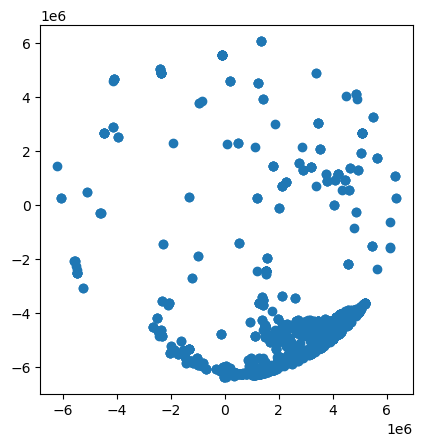

In [57]:
gdf_merge.plot()

In [58]:
gdf_merge.explore()